# Relational database visualization
Notebook created for visualization of relational database created for need of VRAcuity analysis. Presenting data storage format, data distributions, including: 

1. Rat Rehavior - position and orientation in 3 axes
2. Events Log - the experiment course - speed, direction and visibility of the stimulus
3. Sessions data - including the additional data about each session

Each datasets additionally consists of session id, representing data collected in separate experiments.

In [113]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/'

dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
dfsession = pd.read_hdf(path+'relationalDatabase.h5', 'Sessions').set_index('index')

In [114]:
dfsession.head()

,session_id,rat_id,date,experimenter,original_name,video_name,VRspeed
index,,,,,,,
0,0,VR-4A,2017-07-13 02.39.20.315 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC,VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC-Came...,[ 0. 7. 14. 28.]
1,1,VR-2B,2017-07-13 03.05.18.468 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC,VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC-Came...,[ 0. 7. 14. 28.]
2,2,VR-2A,2017-07-13 03.19.28.235 PM,Eduardo Blanco-Hernandez,VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU,VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU-Came...,[ 0. 7. 14. 28.]
3,3,VR-1A,2017-07-13 03.38.35.628 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC,VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC-Came...,[ 0. 7. 14. 28.]
4,4,VR-1B,2017-07-13 03.53.42.156 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC,VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC-Came...,[ 0. 7. 14. 28.]


In [115]:
dfevent.head()

,Frame,Time,MotiveExpTimeSecs,visible,speed,session_id
index,,,,,,
0,0,0.000000,0.0,0,0.0,0
1,0,0.000000,0.0,0,0.0,0
2,1,0.004167,0.0,0,0.0,0
3,2,0.008333,0.0,0,0.0,0
4,3,0.012500,0.0,0,0.0,0


In [116]:
dfrat.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,session_id,X_Ori,Y_Ori,Z_Ori
index,,,,,,,,,
0,0,0.000000,-0.085285,0.051115,-0.039564,0,-0.736724,-0.675770,-0.023923
1,1,0.004167,-0.085192,0.051164,-0.039540,0,-0.735246,-0.677337,-0.025076
2,2,0.008333,-0.085136,0.051032,-0.039595,0,-0.729050,-0.683372,-0.038595
3,3,0.012500,-0.085103,0.051245,-0.039421,0,-0.735124,-0.677244,-0.030557
4,4,0.016667,-0.084992,0.051138,-0.039461,0,-0.728125,-0.683970,-0.044930


## Rat Behavior
Distributions of orientation and postion of the animal, including all experiments and per experiment analysis.

## Position:

In [5]:
# POSITION
pos_l = dfrat.melt(id_vars=['Frame', 'Time', 'session_id'], 
           value_name='Position', value_vars=['X_Pos', 'Y_Pos', 'Z_Pos'], var_name='Dimension'
          )
#pos_l.head()

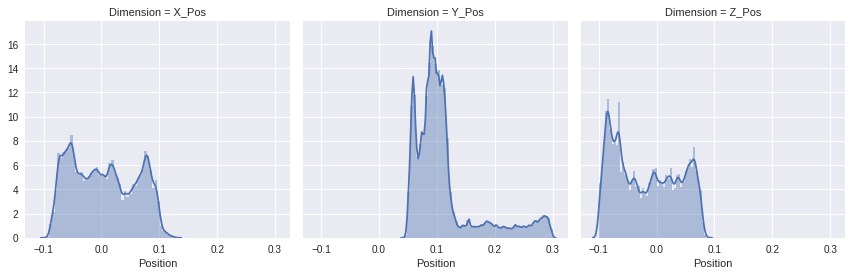

In [6]:
g = sns.FacetGrid(col='Dimension', data=pos_l, size=4)
g.map(sns.distplot, 'Position');

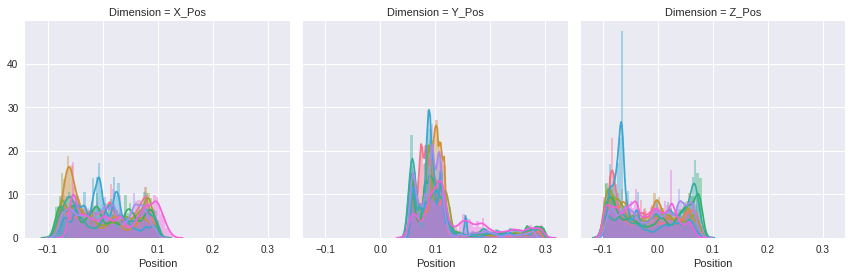

In [7]:
g = sns.FacetGrid(col='Dimension', hue='session_id', data=pos_l, size=4)
g.map(sns.distplot, 'Position');

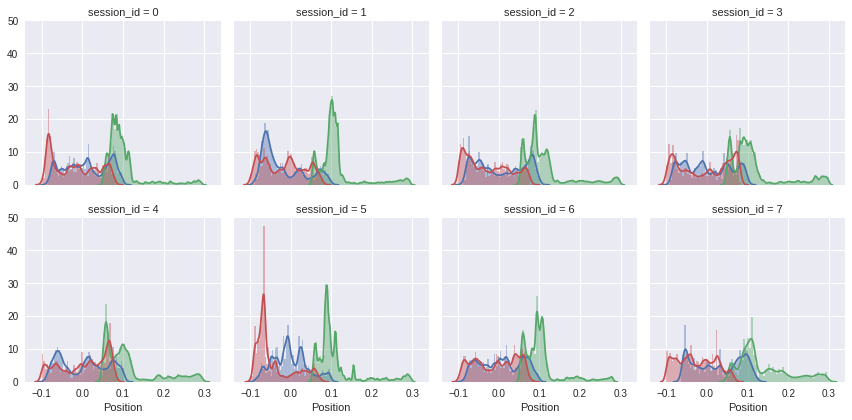

In [8]:
g = sns.FacetGrid(col='session_id', hue='Dimension', data=pos_l, size=3, col_wrap=4)
g.map(sns.distplot, 'Position');

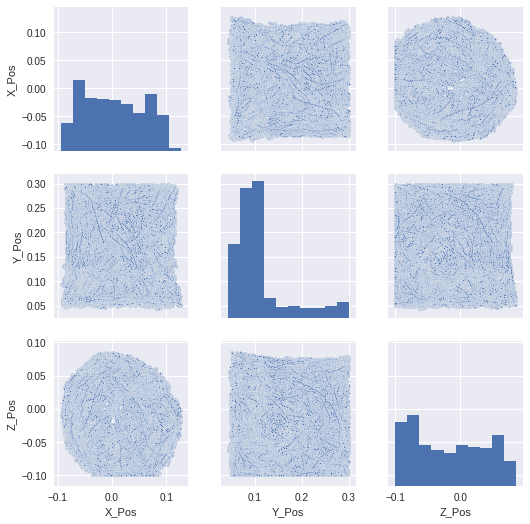

In [125]:
sns.pairplot(dfrat, vars=['X_Pos', 'Y_Pos', 'Z_Pos'], plot_kws={"s": 3});

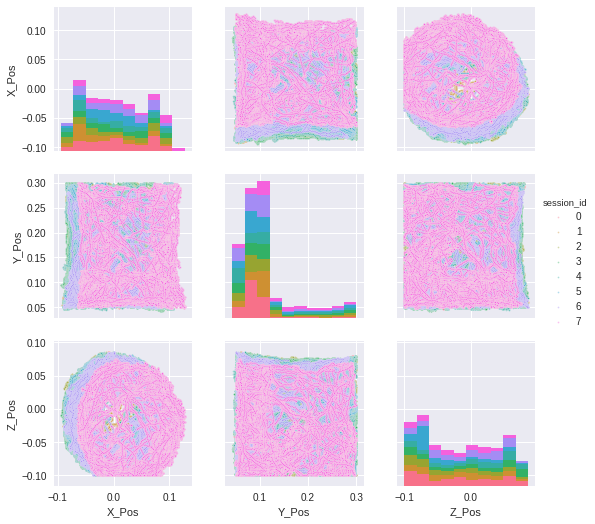

In [135]:
sns.pairplot(dfrat, vars=['X_Pos', 'Y_Pos', 'Z_Pos'], hue='session_id', plot_kws={'s': 3, 'alpha': 0.4});
# reduce point 

/home/ateska/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


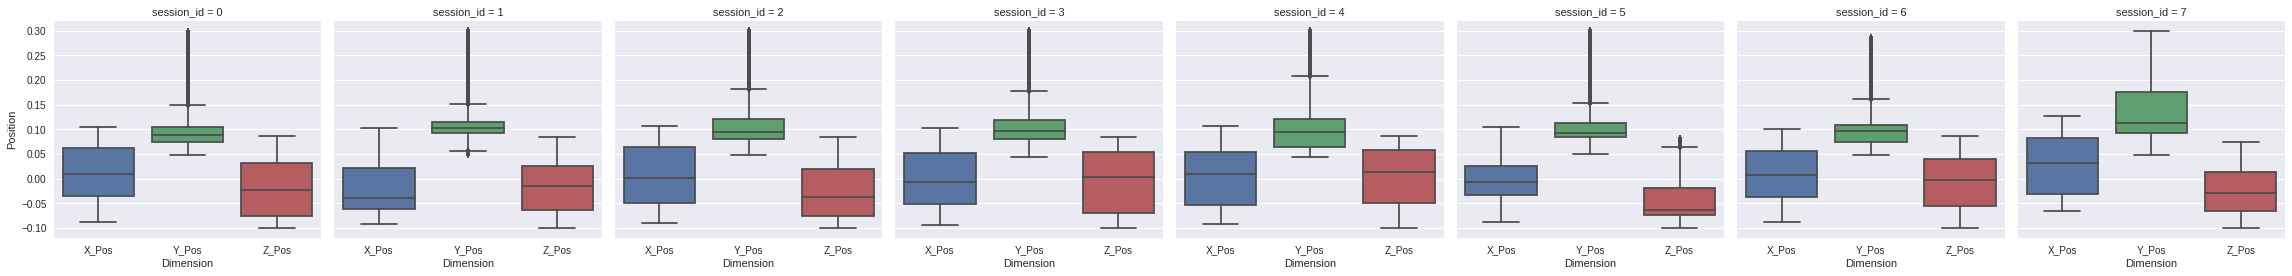

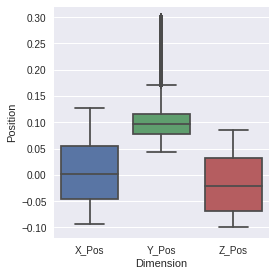

In [11]:
sns.factorplot(x='Dimension', y='Position', col='session_id', data=pos_l, kind='box');
sns.factorplot(x='Dimension', y='Position', data=pos_l, kind='box');

## Orientation:

In [12]:
# ORIENTATION
ori_l = dfrat.melt(id_vars=['Frame', 'Time', 'session_id'], 
           value_name='Orientation', value_vars=['X_Ori', 'Y_Ori', 'Z_Ori'], var_name='Dimension'
          )

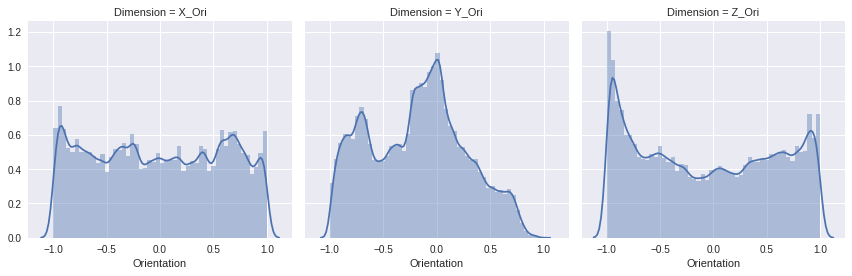

In [13]:
g = sns.FacetGrid(col='Dimension', data=ori_l, size=4)
g.map(sns.distplot, 'Orientation');

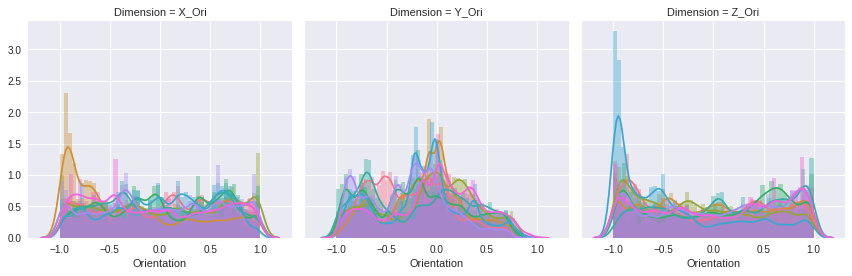

In [14]:
g = sns.FacetGrid(col='Dimension', hue='session_id', data=ori_l, size=4)
g.map(sns.distplot, 'Orientation');

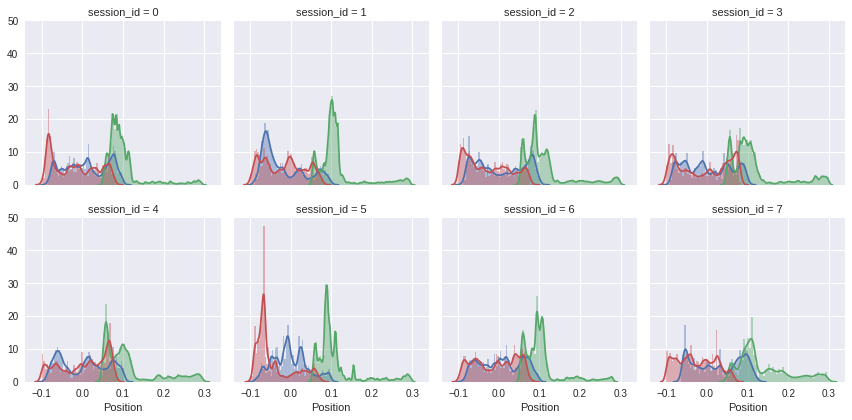

In [15]:
g = sns.FacetGrid(col='session_id', hue='Dimension', data=pos_l, size=3, col_wrap=4)
g.map(sns.distplot, 'Position');

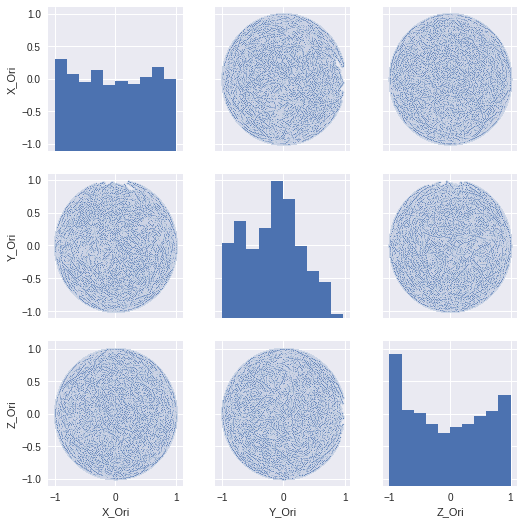

In [133]:
sns.pairplot(dfrat, vars=['X_Ori', 'Y_Ori', 'Z_Ori'], plot_kws={'s':2, 'alpha':0.8});
#point size and alpha

/home/ateska/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


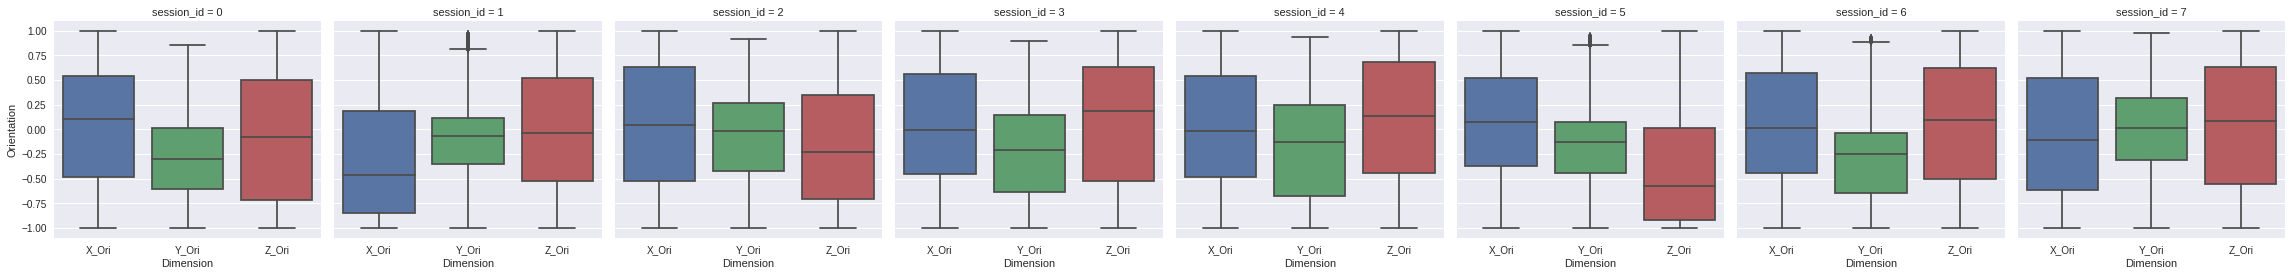

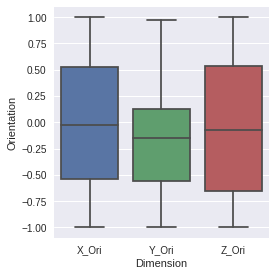

In [17]:
sns.factorplot(x='Dimension', y='Orientation', col='session_id', data=ori_l, kind='box');
sns.factorplot(x='Dimension', y='Orientation', data=ori_l, kind='box');

In [18]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(dfrat['X_Pos'], dfrat['Y_Pos'], dfrat['Z_Pos'], c='skyblue', s=60)
#ax.view_init(30, 185)

#sns.factorplot(x='Dimension', y='Position'   , col='session_id', data=pos_l, kind='box', col_wrap = 4, size = 2);
#sns.factorplot(x='Dimension', y='Orientation', col='session_id', data=ori_l, kind='box', col_wrap = 4, size = 2);

## Event Log
Visualization of experiment events. Speed of grid movement and it's visibility.

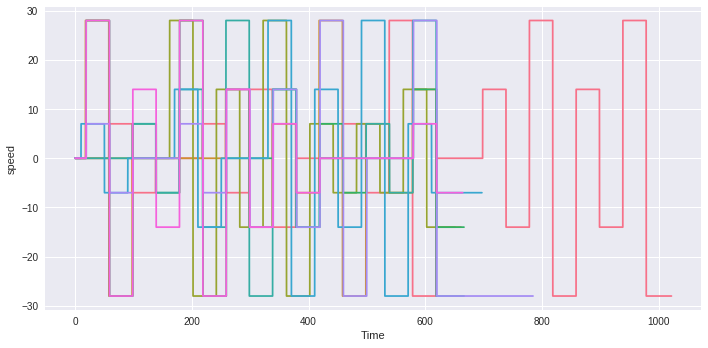

In [54]:
g = sns.FacetGrid(dfevent, hue="session_id", size=5, aspect=2)
g = g.map(plt.plot, "Time", "speed")

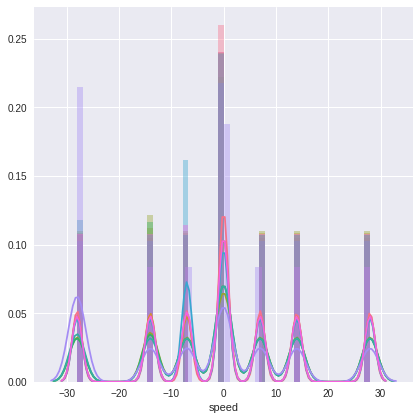

In [98]:
#g = sns.FacetGrid(data=dfevent, size=6)
#g.map(sns.distplot, 'speed');

g = sns.FacetGrid(hue='session_id', data=dfevent, size=6)
g.map(sns.distplot, 'speed');

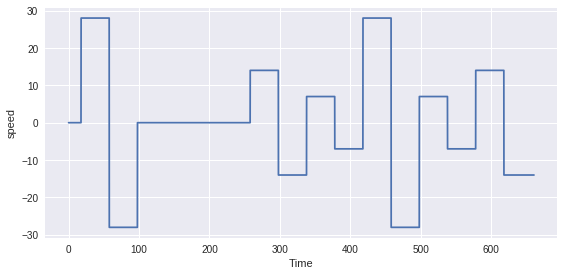

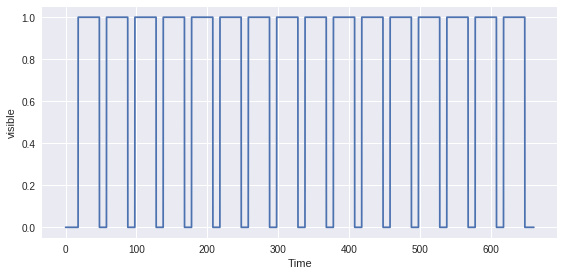

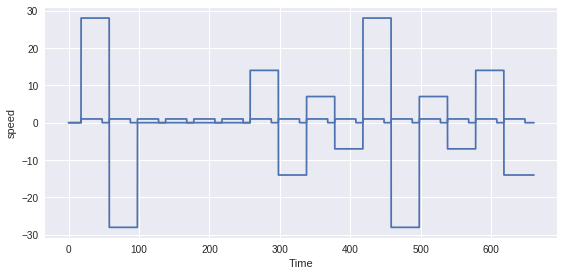

In [100]:
dfevent1 = dfevent[dfevent['session_id']==1]
g = sns.FacetGrid(dfevent1, size=4, aspect=2)
g = g.map(plt.plot, "Time", "speed")

g = sns.FacetGrid(dfevent1, size=4, aspect=2)
g = g.map(plt.plot, "Time", "visible")

g = sns.FacetGrid(dfevent1, size=4, aspect=2)
g = g.map(plt.plot, "Time", "speed", "Time", "visible")
